In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
%matplotlib inline

* **1:** How many power plants are in each state?
* **2:** Which power plants are in New York?
* **3:** Which state has the most hydroelectric power plants?
* **4:** Which state produces the most energy from coal?
* **5:** Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.
* **6:** Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being * orange.
* **7:** Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.
* **8:** Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.
* **9:** Make a map of average air quality of each states, with high quality being light red and low quality being dark red
* **10:** Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red
* **11:** Map of average PM2.5 measurement by county
* **12:** Make a map with color coded power plants, and a 100 mile circle about major American cities.
* **13:** Which states have the most renewable plants, as a % of total plants? (include hydro, wind, solar)

In [79]:
us_states = gpd.read_file('cb_2016_us_state_500k/cb_2016_us_state_500k.shp')
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [75]:
df = pd.read_csv('powerplants.csv')
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(df, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
powerplants.head()

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665)
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069)
2,4,Walter Bouldin Dam,Alabama Power Co,195,Electric Utility,Wetumpka,Elmore,36092,750 Bouldin Dam Road,hydroelectric,225.9,0.0,0.0,0.0,NaN,225.9,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 225.9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,32.583889,-86.283056,POINT (-86.283056 32.583889)
3,7,Gadsden,Alabama Power Co,195,Electric Utility,Gadsden,Etowah,35903,1000 Goodyear Ave,natural gas,130.0,0.0,130.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Natural Gas = 130 MW,Natural Gas Steam Turbine,"EIA-860, EIA-860M and EIA-923",201607,34.012800,-85.970800,POINT (-85.9708 34.0128)
4,8,Gorgas,Alabama Power Co,195,Electric Utility,Parrish,Walker,35580,460 Gorgas Road,coal,1034.0,1034.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Coal = 1034 MW,Conventional Steam Coal,"EIA-860, EIA-860M and EIA-923",201607,33.644344,-87.196486,POINT (-87.19648599999999 33.644344)


In [4]:
us_states.crs

{'init': 'epsg:4269'}

In [5]:
powerplants.crs

{'init': 'epsg:4326'}

In [6]:
us_states.to_crs(powerplants.crs, inplace=True)

In [7]:
us_states.crs

{'init': 'epsg:4326'}

In [73]:
# In order to spatially join the data, they need to be in the same crs. 
# Set the CRS of the us_states map to be the same as the powerplants. Use .head() to make sure the switch worked.
#us_states = us_states.to_crs(epsg=5071)
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


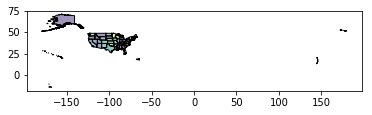

In [9]:
us_states.plot()

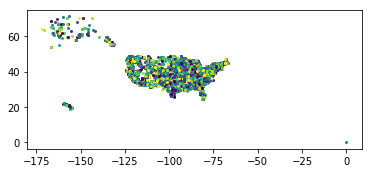

In [10]:
powerplants.plot()

In [11]:
# gpd.sjoin - joins the two datasets together
# we are keeping the geometry of all the powerplants...order is important.
# inner means if powerplants doesn't have a state, get rid off it. - gives only powerplants attached to state
# within - looking for powerplants that are within a state
# left means keep all the powerplants even if they don't have a matching state.

powerplants_with_states = gpd.sjoin(powerplants, us_states, how='inner', op='within')
pd.set_option('display.max_columns', 100)
powerplants_with_states.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


### 1: How many power plants are in each state?

In [12]:
powerplants_with_states.NAME.value_counts()

California              1222
North Carolina           461
Texas                    396
New York                 372
Minnesota                274
Massachusetts            254
Iowa                     222
Michigan                 219
New Jersey               207
Pennsylvania             207
Illinois                 200
Wisconsin                174
Colorado                 153
Ohio                     148
Oregon                   145
Florida                  144
Georgia                  139
Alaska                   138
Washington               138
Idaho                    136
Indiana                  133
Virginia                 131
Kansas                   129
Missouri                 117
Arizona                  113
Nebraska                  98
Maine                     97
South Carolina            95
Oklahoma                  94
New Mexico                92
Utah                      89
Connecticut               88
Louisiana                 84
Maryland                  76
Vermont       

### 2: Which power plants are in New York?

In [13]:
powerplants_with_states[powerplants_with_states.NAME == 'New York']

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
49,88,Ashokan,New York Power Authority,15296,Electric Utility,Kingston,Ulster,12401,Route 28A,hydroelectric,4.6,0.0,0.0,0.0,NaN,4.6,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 4.6 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.949000,-74.206300,POINT (-74.2063 41.949),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
363,579,Central Hudson High Falls,Central Hudson Gas & Elec Corp,3249,Electric Utility,High Falls,ULSTER,12440,Route 213,hydroelectric,3.2,0.0,0.0,0.0,NaN,3.2,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 3.2 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.828814,-74.131877,POINT (-74.131877 41.828814),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
387,625,Upper Mechanicville,New York State Elec & Gas Corp,13511,Electric Utility,Town of Stillwater,Saratoga,12170,40 Hudson Avenue,hydroelectric,18.4,0.0,0.0,0.0,NaN,18.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 18.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,42.912600,-73.680500,POINT (-73.68049999999999 42.9126),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
469,808,Jarvis (Hinckley),New York Power Authority,15296,Electric Utility,Hinckley,Oneida,13352,None,hydroelectric,9.0,0.0,0.0,0.0,NaN,9.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 9 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,43.312100,-75.109000,POINT (-75.10899999999999 43.3121),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1169,2480,Danskammer Generating Station,Danskammer Energy,58971,IPP Non-CHP,Newsburgh,Orange,12550,994 River Road,natural gas,483.7,0.0,478.7,5.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Natural Gas = 478.7 MW, Petroleum = 5 MW",Natural Gas Steam Turbine; Petroleum Liquids;,"EIA-860, EIA-860M and EIA-923",201607,41.571247,-73.974981,POINT (-73.974981 41.571247),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1170,2481,Dashville,Central Hudson Gas & Elec Corp,3249,Electric Utility,Dashville,Ulster,12471,Route 213,hydroelectric,4.8,0.0,0.0,0.0,NaN,4.8,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 4.8 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.821700,-74.049700,POINT (-74.0497 41.8217),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1171,2483,Neversink,New York Power Authority,15296,Electric Utility,Grahmsville,Sullivan,12740,7858 Route 42,hydroelectric,22.0,0.0,0.0,0.0,NaN,22.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 22 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.819400,-74.635800,POINT (-74.6358 41.8194),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1172,2485,South Cairo,Central Hudson Gas & Elec Corp,3249,Electric Utility,Cairo,Greene,12413,Route 32,petroleum,21.3,0.0,0.0,21.3,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 21.3 MW,Petroleum Liquids,"EIA-860, EIA-860M and EIA-923",201607,42.291275,-73.986452,POINT (-73.986452 42.291275),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1173,2486,Sturgeon,Central Hudson Gas & Elec Corp,3249,Electric Utility,Tillson,Ulster,12486,Coutant Road,hydroelectric,14.4,0.0,0.0,0.0,NaN,14.4,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 14.4 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,41.848191,-74.046678,POINT (-74.046678 41.848191),43,0400000US36,122053048985,19243095591,36,00,New York,36,01779796,NY
1174,2487,West Coxsackie,Central Hudson Gas & Elec Corp,3249,Electric Utility,Coxsackie,Greene,12051,Baily Street,petroleum,21.3,0.0,0.0,21.3,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,Petroleum = 21.3 MW,Petroleum Liquid

### 3: Which state has the most hydroelectric power plants?

In [14]:
powerplants_with_states[powerplants_with_states.PrimSource == 'hydroelectric'].NAME.value_counts()

California        245
New York          159
Washington         77
Idaho              75
Oregon             60
Wisconsin          59
Michigan           53
Maine              52
Colorado           43
Vermont            42
North Carolina     41
New Hampshire      38
South Carolina     31
Utah               29
Georgia            29
Massachusetts      28
Tennessee          27
Alabama            23
Virginia           23
Montana            23
Alaska             23
Texas              22
Minnesota          21
Arkansas           19
Pennsylvania       16
Wyoming            16
Connecticut        13
West Virginia      12
Nebraska           10
Oklahoma           10
Kentucky            9
Illinois            8
Nevada              7
Hawaii              7
Arizona             7
Indiana             6
Missouri            5
Ohio                4
New Mexico          4
South Dakota        4
Maryland            3
New Jersey          2
Florida             2
Rhode Island        2
Iowa                2
Kansas    

### 4: Which state produces the most energy from coal?

In [80]:
us_states.set_index('NAME', inplace=True)
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry
NAME,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [16]:
# us_states['Coal_MW'] = powerplants_with_states.NAME.sum()
# us_states.head()

In [17]:
powerplants_with_states.groupby('NAME')['Coal_MW'].sum().sort_values(ascending=False).head()

NAME
Texas           23588.5
Indiana         16111.4
Ohio            15189.9
Illinois        14644.6
Pennsylvania    13313.4
Name: Coal_MW, dtype: float64

In [81]:
us_states['Coal_MW'] =  powerplants_with_states.groupby('NAME')['Coal_MW'].sum()
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,Coal_MW
NAME,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",153.8
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5910.0
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",5122.4
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",90.0


### 5: Map states with nuclear power plants in red, and states without in grey. Do the same thing for solar.

In [19]:
states_with_nuclear = powerplants_with_states[(powerplants_with_states['PrimSource'] == 'nuclear')]
states_with_nuclear.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
22,46,Browns Ferry,Tennessee Valley Authority,18642,Electric Utility,Decatur,Limestone,35609,Shaw Rd. PO Box 2000,nuclear,3309.4,0.0,0.0,0.0,NaN,0.0,0.0,3309.4,0.0,0.0,NaN,NaN,Nuclear = 3309.4 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,34.7042,-87.1189,POINT (-87.1189 34.7042),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1820,6001,Joseph M Farley,Alabama Power Co,195,Electric Utility,Columbia,Houston,36319,7388 North State Highway 95,nuclear,1757.0,0.0,0.0,0.0,NaN,0.0,0.0,1757.0,0.0,0.0,NaN,NaN,Nuclear = 1757 MW,Nuclear,"EIA-860, EIA-860M and EIA-923",201607,31.2231,-85.1116,POINT (-85.1116 31.2231),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


In [20]:
states_without_nuclear = powerplants_with_states[(powerplants_with_states['PrimSource'] != 'nuclear')]
states_without_nuclear.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


(25, 50)

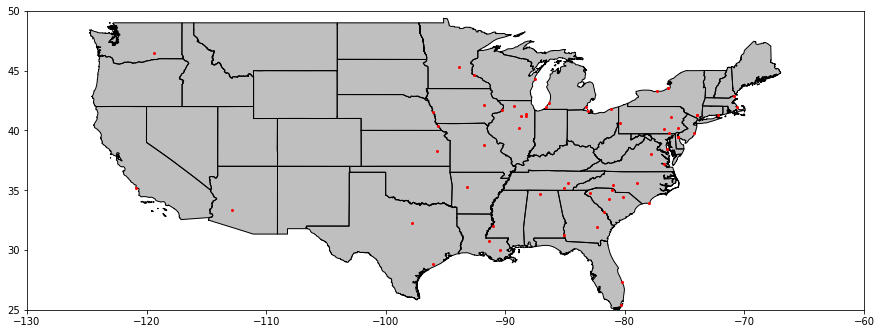

In [21]:
ax = us_states.plot(figsize=(15, 10), color='gray')
states_with_nuclear.plot(color='red', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

# states_without_nuclear = powerplants_with_states[(powerplants_with_states['PrimSource'] != 'nuclear')]


In [22]:
states_with_solar = powerplants_with_states[(powerplants_with_states['PrimSource'] == 'solar')]
states_with_solar.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
5285,57197,Blue Wing Solar Energy Generation,TX Solar I LLC,56565,IPP Non-CHP,San Antonio,Bexar,78223,10810 S Blue Wind Rd.,solar,13.5,0.0,0.0,0.0,NaN,0.0,0.0,0.0,13.5,0.0,NaN,NaN,Solar = 13.5 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,29.304177,-98.400339,POINT (-98.400339 29.304177),49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX
5679,57699,Webberville Solar Project,FRV AE Solar LLC,57021,IPP Non-CHP,Manor,Travis,78653,18580 FM 969,solar,30.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,30.0,0.0,NaN,NaN,Solar = 30 MW,Solar Photovoltaic,"EIA-860, EIA-860M and EIA-923",201607,30.238492,-97.508812,POINT (-97.50881200000001 30.238492),49,0400000US48,676633459408,19025991684,48,00,Texas,48,01779801,TX


In [23]:
states_without_solar = powerplants_with_states[(powerplants_with_states['PrimSource'] != 'solar')]
states_without_solar.head(2)

,Plant_Code,Plant_Name,Utility_Na,Utility_ID,sector_nam,City,County,Zip,Street_Add,PrimSource,Total_MW,Coal_MW,NG_MW,Crude_MW,Bio_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Geo_MW,Other_MW,source_des,tech_desc,Source,Period,Latitude,Longitude,geometry,index_right,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS
0,2,Bankhead Dam,Alabama Power Co,195,Electric Utility,Northport,Tuscaloosa,35476,19001 Lock 17 Road,hydroelectric,56.0,0.0,0.0,0.0,NaN,56.0,0.0,0.0,0.0,0.0,NaN,NaN,Hydroelectric = 56 MW,Conventional Hydroelectric,"EIA-860, EIA-860M and EIA-923",201607,33.458665,-87.356823,POINT (-87.35682299999999 33.458665),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL
1,3,Barry,Alabama Power Co,195,Electric Utility,Bucks,Mobile,36512,North Highway 43,coal,2160.5,1088.5,1072.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,NaN,"Coal = 1088.5 MW, Natural Gas = 1072 MW",Conventional Steam Coal; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",201607,31.006900,-88.010300,POINT (-88.0103 31.0069),0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL


(25, 50)

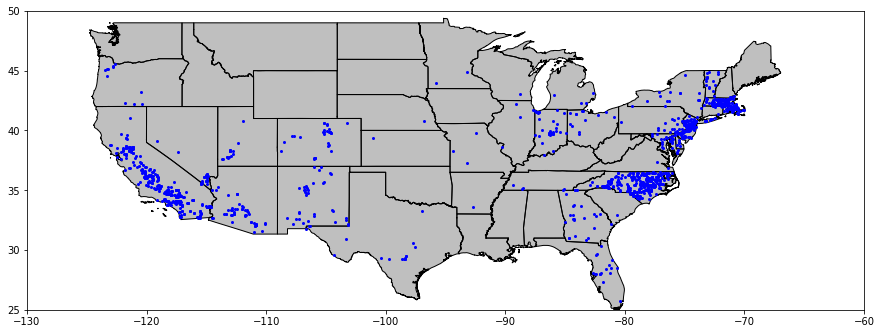

In [24]:
ax = us_states.plot(figsize=(15, 10), color='gray')
states_with_solar.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

### 6: Make a map of carbon dioxide emissions by state, with low emissions being light orange and high emissions being * orange.

In [25]:
carbondioxide = pd.read_csv('Total Carbon Dioxide Emissions-StateRankings.csv')
carbondioxide.head()

,Rank,State,Carbon_Dioxide _Emissions,Note: Rankings are based on the full source data values.
0,1,TX,642,NaN
1,2,CA,358,NaN
2,3,PA,245,NaN
3,4,IL,234,NaN
4,5,OH,232,NaN


In [76]:
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,NAME,STATEFP,STATENS,STUSPS,geometry,Wind_MW
0,0400000US01,131173688951,4593686489,01,00,Alabama,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",NaN
1,0400000US02,1477946266785,245390495931,02,00,Alaska,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",NaN
2,0400000US04,294198560125,1027346486,04,00,Arizona,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",NaN
3,0400000US05,134771517596,2960191698,05,00,Arkansas,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",NaN
4,0400000US06,403501101370,20466718403,06,00,California,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",NaN


In [27]:
# new_data = pd.merge(left, right, how='left'
# combine = powerplants_with_states.join(carbondioxide, on="STUSPS")
# combine.head()

new_data = us_states[['STUSPS', 'geometry']]
new_data.head()

,STUSPS,geometry
NAME,,
Alabama,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999..."
Alaska,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5..."
Arizona,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3..."
Arkansas,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ..."
California,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ..."


In [28]:
combine = new_data.merge(carbondioxide, left_on="STUSPS", right_on="State")
combine.head()

,STUSPS,geometry,Rank,State,Carbon_Dioxide _Emissions,Note: Rankings are based on the full source data values.
0,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,AL,123,NaN
1,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",40,AK,35,NaN
2,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",23,AZ,93,NaN
3,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",29,AR,69,NaN
4,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",2,CA,358,NaN


In [29]:
del combine['State']

In [30]:
del combine['Note: Rankings are based on the full source data values.']

In [31]:
combine.head()

,STUSPS,geometry,Rank,Carbon_Dioxide _Emissions
0,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",15,123
1,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",40,35
2,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",23,93
3,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",29,69
4,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",2,358


(25, 50)

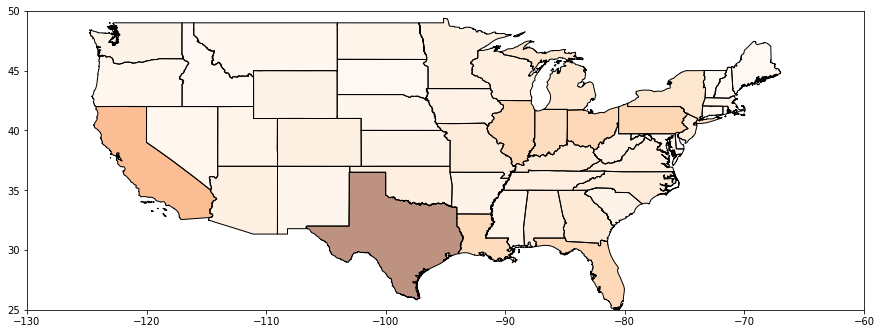

In [32]:
# 6: Make a map of carbon dioxide emissions by state, 
# with low emissions being light orange and high emissions being * orange.

ax =combine.plot(column='Carbon_Dioxide _Emissions', figsize=(15, 10), cmap='Oranges')

# ax = us_states.plot(figsize=(15, 10), color='gray')
# combine.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

### 7: Make a map of total energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [82]:
us_states['Total_MW'] =  powerplants_with_states.groupby('NAME')['Total_MW'].sum()
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,Coal_MW,Total_MW
NAME,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4,29654.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",153.8,2616.5
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5910.0,27083.4
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",5122.4,14706.7
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",90.0,76586.9


(25, 50)

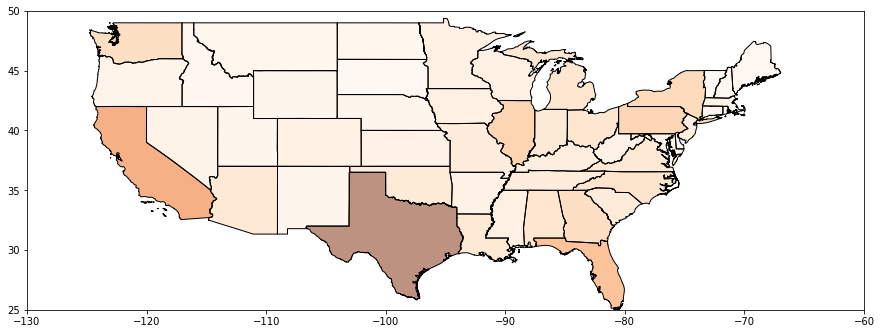

In [67]:
ax =us_states.plot(column='Total_MW', figsize=(15, 10), cmap='Oranges')

# ax = us_states.plot(figsize=(15, 10), color='gray')
# combine.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')


### 8: Make a map of total wind (or solar or coal) energy produced by each state, with little being a light color and high emissions being a brighter/darker color.

In [83]:
us_states['Solar_MW'] =  powerplants_with_states.groupby('NAME')['Solar_MW'].sum()
us_states.head()

,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,Coal_MW,Total_MW,Solar_MW
NAME,,,,,,,,,,,,
Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4,29654.0,0.0
Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",153.8,2616.5,0.0
Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5910.0,27083.4,1568.5
Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",5122.4,14706.7,12.0
California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",90.0,76586.9,8146.9


(25, 50)

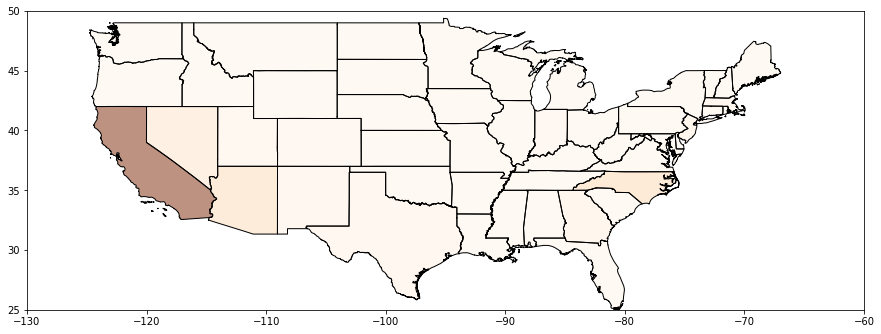

In [84]:
ax =us_states.plot(column='Solar_MW', figsize=(15, 10), cmap='Oranges')

# ax = us_states.plot(figsize=(15, 10), color='gray')
# combine.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')


In [33]:
us_states.reset_index(inplace=True)


### 9: Make a map of average air quality of each states, with high quality being light red and low quality being dark red

In [34]:
df = pd.read_csv('pm25_annual_fixed.csv', usecols = ['Latitude', 'Longitude', 'Datum', 'Arithmetic Mean', '1st Max Value', 'State Name', 'County Name', 'City Name'])
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air_quality = gpd.GeoDataFrame(df, geometry=points)
air_quality.crs = {'init': 'epsg:4326'}
air_quality.head()

,Latitude,Longitude,Datum,Arithmetic Mean,1st Max Value,State Name,County Name,City Name,geometry
0,30.497478,-87.880258,NAD83,6.535714,15.4,Alabama,Baldwin,Fairhope,POINT (-87.880258 30.497478)
1,33.284928,-85.803608,NAD83,8.851852,19.0,Alabama,Clay,Ashland,POINT (-85.803608 33.284928)
2,34.762619,-87.638097,NAD83,7.650000,17.8,Alabama,Colbert,Muscle Shoals,POINT (-87.638097 34.762619)
3,34.288567,-85.969858,NAD83,8.083333,14.8,Alabama,DeKalb,Crossville,POINT (-85.969858 34.288567)
4,33.991494,-85.992647,NAD83,9.073333,17.5,Alabama,Etowah,Gadsden,POINT (-85.99264699999998 33.991494)


In [35]:
us_states.head()

,NAME,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,Coal_MW
0,Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4
1,Alaska,0400000US02,1477946266785,245390495931,02,00,02,01785533,AK,"(POLYGON ((-134.737262 58.261354, -134.73441 5...",153.8
2,Arizona,0400000US04,294198560125,1027346486,04,00,04,01779777,AZ,"POLYGON ((-114.816294 32.508038, -114.814321 3...",5910.0
3,Arkansas,0400000US05,134771517596,2960191698,05,00,05,00068085,AR,"POLYGON ((-94.6178329666013 36.4994141203285, ...",5122.4
4,California,0400000US06,403501101370,20466718403,06,00,06,01779778,CA,"(POLYGON ((-118.604415 33.478552, -118.598783 ...",90.0


In [36]:
states_air_quality = gpd.sjoin(us_states, air_quality, how='left', op='contains')
# pd.set_option('display.max_columns', 100)
states_air_quality.head(2)

,NAME,AFFGEOID,ALAND,AWATER,GEOID,LSAD,STATEFP,STATENS,STUSPS,geometry,Coal_MW,index_right,Latitude,Longitude,Datum,Arithmetic Mean,1st Max Value,State Name,County Name,City Name
0,Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4,12,30.770181,-88.087761,NAD83,7.635714,17.7,Alabama,Mobile,Chickasaw
0,Alabama,0400000US01,131173688951,4593686489,01,00,01,01779775,AL,"(POLYGON ((-88.053375 30.506987, -88.051087999...",7979.4,0,30.497478,-87.880258,NAD83,6.535714,15.4,Alabama,Baldwin,Fairhope


(25, 50)

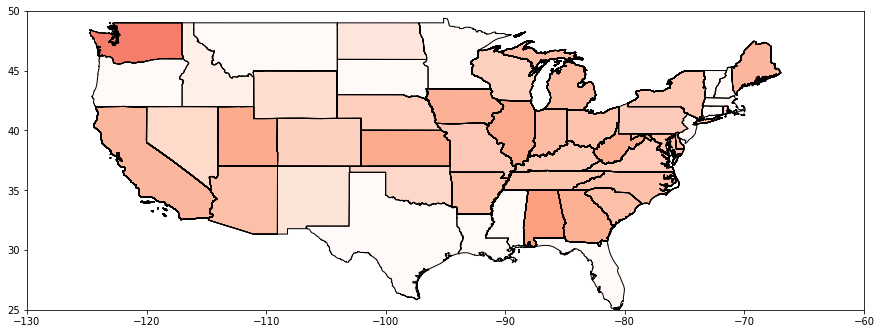

In [37]:
ax = states_air_quality.plot(column='Arithmetic Mean', figsize=(15, 10), cmap='Reds')

# ax = us_states.plot(figsize=(15, 10), color='gray')
# combine.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

### 10: Make a map of worst air quality measured in each state, with high quality being light red and low quality being dark red

(25, 50)

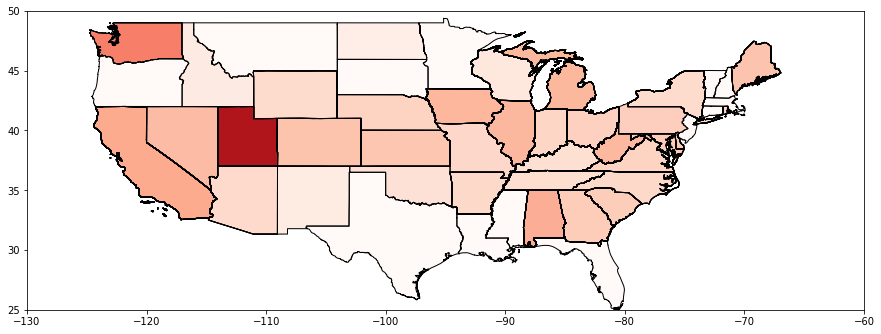

In [38]:
ax = states_air_quality.plot(column='1st Max Value', figsize=(15, 10), cmap='Reds')

# ax = us_states.plot(figsize=(15, 10), color='gray')
# combine.plot(color='blue', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])
# ax.axis('off')

### 11: Map of average PM2.5 measurement by county

In [39]:
counties = gpd.read_file('cb_2016_us_county_500k/cb_2016_us_county_500k.shp')
counties.head()

,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP,geometry
0,0500000US19107,1500067253,1929323,107,00465242,19107,06,Keokuk,19,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
1,0500000US19189,1037261946,3182052,189,00465283,19189,06,Winnebago,19,"POLYGON ((-93.97076 43.499605, -93.88843009910..."
2,0500000US20093,2254696689,1133601,093,00485011,20093,06,Kearny,20,"POLYGON ((-101.54192 37.914575, -101.541863 37..."
3,0500000US20123,1817632928,44979981,123,00485026,20123,06,Mitchell,20,"POLYGON ((-98.49006799999999 39.241666, -98.49..."
4,0500000US20187,1762104518,178555,187,00485055,20187,06,Stanton,20,"POLYGON ((-102.041899 37.541186, -102.041894 3..."


In [40]:
counties.crs

{'init': 'epsg:4269'}

In [41]:
df = pd.read_csv('pm25_annual_fixed.csv', usecols = ['Latitude', 'Longitude', 'Datum', 'Arithmetic Mean', '1st Max Value', 'State Name', 'County Name', 'City Name'])
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
air_quality = gpd.GeoDataFrame(df, geometry=points)
air_quality.crs = {'init': 'epsg:4326'}
# air_quality.head()

In [42]:
counties.to_crs(air_quality.crs, inplace=True)

In [43]:
counties.crs

{'init': 'epsg:4326'}

In [44]:
air_quality_counties = gpd.sjoin(air_quality, counties, how='inner', op='within')
pd.set_option('display.max_columns', 100)
air_quality_counties.head(2)

,Latitude,Longitude,Datum,Arithmetic Mean,1st Max Value,State Name,County Name,City Name,geometry,index_right,AFFGEOID,ALAND,AWATER,COUNTYFP,COUNTYNS,GEOID,LSAD,NAME,STATEFP
0,30.497478,-87.880258,NAD83,6.535714,15.4,Alabama,Baldwin,Fairhope,POINT (-87.880258 30.497478),19,0500000US01003,4117584019,1133130502,003,00161527,01003,06,Baldwin,01
1,33.284928,-85.803608,NAD83,8.851852,19.0,Alabama,Clay,Ashland,POINT (-85.803608 33.284928),1230,0500000US01027,1564252455,5284573,027,00161539,01027,06,Clay,01


(25, 50)

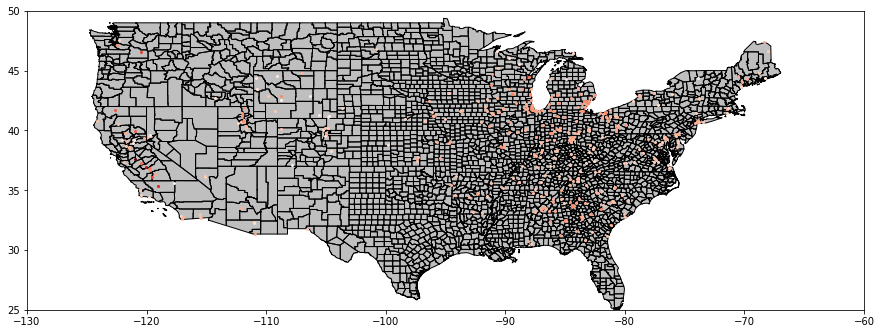

In [45]:
ax = counties.plot(figsize=(15, 10), color='gray')
air_quality_counties.plot(column='Arithmetic Mean', figsize=(15, 10), cmap='Reds', ax=ax)
ax.set_xlim([-130,-60])
ax.set_ylim([25,50])

### 12: Make a map with color coded power plants, and a 100 mile circle about major American cities.

In [46]:
cities = gpd.read_file('citiesx010g_shp_nt00962/citiesx010g.shp')
cities.crs = {'init':'merc'}
cities.head(2)               

,ANSICODE,COUNTY,COUNTYFIPS,ELEV_IN_FT,ELEV_IN_M,FEATURE,FEATURE2,GNIS_ID,LATITUDE,LONGITUDE,NAME,POP_2010,PopPlLat,PopPlLong,STATE,STATE_FIPS,geometry
0,1036000,Rolette,079,1706.0,520.0,Civil,-999,1028750.0,48.813057,-100.060968,Dunseith,773.0,48.813057,-100.060968,ND,38,POINT (-100.0609678 48.81305690000016)
1,1036174,Rolette,079,1654.0,504.0,Civil,-999,1030349.0,48.635278,-99.618756,Mylo,20.0,48.635278,-99.618756,ND,38,POINT (-99.61875549999991 48.63527850000003)


In [50]:
df = pd.read_csv('powerplants.csv')
points = df.apply(lambda row: Point(row.Longitude, row.Latitude), axis=1)
powerplants = gpd.GeoDataFrame(df, geometry=points)
powerplants.crs = {'init': 'epsg:4326'}
# powerplants.head()

In [51]:
powerplants.crs = {'init':'merc'}

In [52]:
print(powerplants.crs)
print(cities.crs)

{'init': 'merc'}
{'init': 'merc'}


In [53]:
buffered_cities = cities.buffer(160934)

In [ ]:
ax = powerplants.plot(color='grey', linewidth=0.25, figsize=(20,20))
ax.axis('off')
buffered_cities.plot(color='red', alpha=0.5, ax=ax,linewidth=0)